In [ ]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [ ]:
presponse = requests.get('https://visaguide.world/europe/')

In [ ]:
gdpresponse = requests.get('https://en.m.wikipedia.org/wiki/List_of_sovereign_states_in_Europe_by_GDP_(nominal)')

In [ ]:
popsoup = BeautifulSoup(presponse.content, 'html.parser')

In [ ]:
gdpsoup = BeautifulSoup(presponse.content, 'html.parser')

In [ ]:
poptable=popsoup.find_all('table')

In [ ]:
gdptable=gdpsoup.find_all('table')

In [ ]:
popheadings = poptable[1].find_all('th')
popheadings

[<th>Country</th>, <th>Capital</th>, <th>Area</th>, <th>Population (2021)</th>]

In [ ]:
gdpheadings=gdptable[1].find_all('th')
gdpheadings

[<th>Country</th>, <th>Capital</th>, <th>Area</th>, <th>Population (2021)</th>]

In [ ]:
popheadings=poptable[1].find_all('th')
popheadings=[i.text.strip() for i in popheadings]


In [ ]:
gdpheadings1 = [i.strip() for i in gdpheadings]


In [ ]:
gdpheadings=gdpheadings1

In [ ]:
if len(gdpheadings) > 1:
  gdpheadings[1]=gdpheadings[1][:4]
else:
  print("List has fewer than 2 elements")

In [ ]:
print(gdpheadings)

['Country', 'Capi', 'Area', 'Population (2021)']


In [ ]:
gdpheadings

['Country', 'Capi', 'Area', 'Population (2021)']

In [ ]:
poprows=poptable[1].find_all('td')
poprows

[<td>Albania</td>,
 <td>Tirana</td>,
 <td>28,748 km²</td>,
 <td>2.8 million</td>,
 <td>Andorra</td>,
 <td>Andorra la Vella</td>,
 <td>468 km²</td>,
 <td>77,335</td>,
 <td>Austria</td>,
 <td>Vienna</td>,
 <td>83,858 km²</td>,
 <td>9 million</td>,
 <td>Belarus</td>,
 <td>Minsk</td>,
 <td>207,560 km²</td>,
 <td>9.4 million</td>,
 <td>Belgium</td>,
 <td>Brussels</td>,
 <td>30,528 km²</td>,
 <td>11.6 million</td>,
 <td>Bosnia and Herzegovina</td>,
 <td>Sarajevo</td>,
 <td>51,129 km²</td>,
 <td>3.2 million</td>,
 <td>Bulgaria</td>,
 <td>Sofia</td>,
 <td>110,910 km²</td>,
 <td>6.8 million</td>,
 <td>Croatia</td>,
 <td>Zagreb</td>,
 <td>56,542 km²</td>,
 <td>4 million</td>,
 <td>Cyprus</td>,
 <td>Nicosia</td>,
 <td>9,251 km²</td>,
 <td>1.2 million</td>,
 <td>Czech Republic</td>,
 <td>Prague</td>,
 <td>78,866 km²</td>,
 <td>10.7 million</td>,
 <td>Denmark</td>,
 <td>Copenhagen</td>,
 <td>43,094 km²</td>,
 <td>5.8 million</td>,
 <td>Estonia</td>,
 <td>Tallinn</td>,
 <td>45,226 km²</td>,
 <td>1.3

In [ ]:
poprows = [i.strip() for i in poprows]

In [ ]:
gdprows=gdptable[1].find_all('td')


In [ ]:
gdprows=[i.text.strip() for i in gdprows]


In [ ]:
popdict={}
n=0
for i in popheadings:
   popdict[i]=[poprows[j] for j in range(n,len(poprows),len(popheadings))]
   n+=1


In [ ]:
gdpdict={}
n=0
for i in gdpheadings:
    gdpdict[i]=[gdprows[j] for j in range(n,len(gdprows),len(gdpheadings1))]
    n+=1

In [ ]:
popdf = pd.DataFrame(popdict)
gdpdf = pd.DataFrame(gdpdict)

In [ ]:
popdf

,Country,Capital,Area,Population (2021)
0,Albania,Tirana,"28,748 km²",2.8 million
1,Andorra,Andorra la Vella,468 km²,"77,335"
2,Austria,Vienna,"83,858 km²",9 million
3,Belarus,Minsk,"207,560 km²",9.4 million
4,Belgium,Brussels,"30,528 km²",11.6 million
5,Bosnia and Herzegovina,Sarajevo,"51,129 km²",3.2 million
6,Bulgaria,Sofia,"110,910 km²",6.8 million
7,Croatia,Zagreb,"56,542 km²",4 million
8,Cyprus,Nicosia,"9,251 km²",1.2 million
9,Czech Republic,Prague,"78,866 km²",10.7 million


In [ ]:
gdpdf

,Country,2024
0,Germany,"4,683.233"
1,United Kingdom,"3,557.465"
2,France,"3,156.325"
3,Italy,"2,365.541"
4,Russia,"2,158.786"
5,Spain,"1,724.379"
6,Turkey,"1,312.932"
7,Netherlands,"1,209.072"
8,Switzerland,935.316
9,Poland,908.561


In [ ]:
gdpdf1=gdpdf.copy()

In [ ]:
print(gdpdf)

                   Country              Capi           Area Population (2021)
0                  Albania            Tirana     28,748 km²       2.8 million
1                  Andorra  Andorra la Vella        468 km²            77,335
2                  Austria            Vienna     83,858 km²         9 million
3                  Belarus             Minsk    207,560 km²       9.4 million
4                  Belgium          Brussels     30,528 km²      11.6 million
5   Bosnia and Herzegovina          Sarajevo     51,129 km²       3.2 million
6                 Bulgaria             Sofia    110,910 km²       6.8 million
7                  Croatia            Zagreb     56,542 km²         4 million
8                   Cyprus           Nicosia      9,251 km²       1.2 million
9           Czech Republic            Prague     78,866 km²      10.7 million
10                 Denmark        Copenhagen     43,094 km²       5.8 million
11                 Estonia           Tallinn     45,226 km²     

In [ ]:
popdf.rename(columns={"Population (2021)": "Population"},inplace=True)


In [ ]:
for i in range(len(popdf['Population'])):
  value = str(popdf.at [i, 'Population'])

  if 'million' in value:
     popdf.at[i, 'Population'] = float(value.replace('million', '').strip()) *10**6
  else:
      value = value.replace(".", "").replace(",", "")
      popdf.at[i, 'Population'] = value

In [ ]:
popdf['Population']=popdf['Population'].astype(float).round(2)

In [ ]:
for i in range(len(popdf['Area'])):
  value = str(popdf.at [i, 'Area'])

  if 'km²' in value:
      value = value.replace(',', '')
      value = float(value.replace('km²', ''))
      popdf.at[i, 'Area'] = value

In [ ]:
popdf['Population Density']=popdf['Population']/popdf['Area']


In [ ]:
print("columns in popdf:",popdf.columns)
print("columns in gdpdf:",gdpdf.columns)

columns in popdf: Index(['Country', 'Capital', 'Area', 'Population', 'Population Density'], dtype='object')
columns in gdpdf: Index(['Country', 'Capi', 'Area', 'Population (2021)'], dtype='object')


In [ ]:
print("gdpdict:",gdpdict)

gdpdict: {'Country': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'], 'Capi': ['Tirana', 'Andorra la Vella', 'Vienna', 'Minsk', 'Brussels', 'Sarajevo', 'Sofia', 'Zagreb', 'Nicosia', 'Prague', 'Copenhagen', 'Tallinn', 'Helsinki', 'Paris', 'Berlin', 'Athens', 'Budapest', 'Reykjavik', 'Dublin', 'Rome', 'Prishtina', 'Riga', 'Vaduz', 'Vilnius', 'Luxembourg', 'Valletta', 'Chisinau', 'Monaco', 'Podgorica', 'Amsterdam', 'Skopje', 'Oslo', 'Warsaw', 'Lisbon', 'Bucharest', 'Moscow', 'San Marin

In [ ]:
gdpdf=pd.DataFrame(gdpdict)
print(gdpdf.head())

   Country              Capi         Area Population (2021)
0  Albania            Tirana   28,748 km²       2.8 million
1  Andorra  Andorra la Vella      468 km²            77,335
2  Austria            Vienna   83,858 km²         9 million
3  Belarus             Minsk  207,560 km²       9.4 million
4  Belgium          Brussels   30,528 km²      11.6 million


In [ ]:
print("Columns in gdpdf:" , gdpdf.columns)

Columns in gdpdf: Index(['Country', 'Capi', 'Area', 'Population (2021)'], dtype='object')


In [ ]:
print(gdptable)
print(gdprows)

[<table>
<tbody>
<tr>
<td>Area</td>
<td>10,180,000 km²</td>
</tr>
<tr>
<td>Number of countries</td>
<td>46 (plus transcontinental countries)</td>
</tr>
<tr>
<td>Biggest country (by area)</td>
<td>Russia</td>
</tr>
<tr>
<td>Population (2021)</td>
<td>747.8 million</td>
</tr>
<tr>
<td>Most populated country</td>
<td>Russia</td>
</tr>
<tr>
<td>Number of languages spoken</td>
<td>Over 200 languages across the continent</td>
</tr>
<tr>
<td>Largest peninsula</td>
<td>The Scandinavian Peninsula</td>
</tr>
<tr>
<td>Highest mountain</td>
<td>Mount Elbrus in Russia</td>
</tr>
<tr>
<td>Longest river</td>
<td>Volga River in Russia</td>
</tr>
</tbody>
</table>, <table>
<thead>
<tr>
<th>Country</th>
<th>Capital</th>
<th>Area</th>
<th>Population (2021)</th>
</tr>
</thead>
<tbody>
<tr>
<td>Albania</td>
<td>Tirana</td>
<td>28,748 km²</td>
<td>2.8 million</td>
</tr>
<tr>
<td>Andorra</td>
<td>Andorra la Vella</td>
<td>468 km²</td>
<td>77,335</td>
</tr>
<tr>
<td>Austria</td>
<td>Vienna</td>
<td>83,858 km²

In [ ]:
print("gdpdict:",gdpdict)

gdpdict: {'Country': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'], 'Capi': ['Tirana', 'Andorra la Vella', 'Vienna', 'Minsk', 'Brussels', 'Sarajevo', 'Sofia', 'Zagreb', 'Nicosia', 'Prague', 'Copenhagen', 'Tallinn', 'Helsinki', 'Paris', 'Berlin', 'Athens', 'Budapest', 'Reykjavik', 'Dublin', 'Rome', 'Prishtina', 'Riga', 'Vaduz', 'Vilnius', 'Luxembourg', 'Valletta', 'Chisinau', 'Monaco', 'Podgorica', 'Amsterdam', 'Skopje', 'Oslo', 'Warsaw', 'Lisbon', 'Bucharest', 'Moscow', 'San Marin

In [ ]:
print("GDPDF Columns:",gdpdf.columns)
print("POPDF Columns:",popdf.columns)


GDPDF Columns: Index(['Country', 'Capi', 'Area', 'Population (2021)'], dtype='object')
POPDF Columns: Index(['Country', 'Capital', 'Area', 'Population', 'Population Density'], dtype='object')


In [ ]:

finaldata=pd.merge(gdpdf,popdf,on='Country')

In [ ]:
gdpdf['Country']=gdpdf['Country'].str.strip()
popdf['Country']=popdf['Country'].str.strip()

In [ ]:
gdpdf.head(10)

,Country,Capi,Area,Population (2021)
0,Albania,Tirana,"28,748 km²",2.8 million
1,Andorra,Andorra la Vella,468 km²,"77,335"
2,Austria,Vienna,"83,858 km²",9 million
3,Belarus,Minsk,"207,560 km²",9.4 million
4,Belgium,Brussels,"30,528 km²",11.6 million
5,Bosnia and Herzegovina,Sarajevo,"51,129 km²",3.2 million
6,Bulgaria,Sofia,"110,910 km²",6.8 million
7,Croatia,Zagreb,"56,542 km²",4 million
8,Cyprus,Nicosia,"9,251 km²",1.2 million
9,Czech Republic,Prague,"78,866 km²",10.7 million


In [ ]:
print(finaldata.columns)

Index(['Country', 'Capi', 'Area_x', 'Population (2021)', 'Capital', 'Area_y',
       'Population', 'Population Density'],
      dtype='object')


In [ ]:
finaldata.rename(columns={'GDP_2024': '2024'},inplace=True)

In [ ]:


# ipython-input-148-8b3dc7687592

import pandas as pd
finaldata =pd.merge(popdf, gdpdf, on ='Country')
finaldata.rename(columns={"GDP_2024": "2024"}, inplace=True)
if '2024' in finaldata.columns and finaldata['2024'].dtype=='object':
        finaldata['2024'] = finaldata['2024'].str.replace(",", "").astype(float).round(2)

In [ ]:
print(finaldata.columns)

Index(['Country', 'Capital', 'Area_x', 'Population', 'Population Density',
       'Capi', 'Area_y', 'Population (2021)'],
      dtype='object')


In [ ]:
print(finaldata.columns)

Index(['Country', 'Capital', 'Area_x', 'Population', 'Population Density',
       'Capi', 'Area_y', 'Population (2021)'],
      dtype='object')


In [ ]:
print(finaldata[['Country','Population (2021)']].head())

   Country Population (2021)
0  Albania       2.8 million
1  Andorra            77,335
2  Austria         9 million
3  Belarus       9.4 million
4  Belgium      11.6 million


In [ ]:
finaldata.rename(columns={'Population (2021)': '2024'}, inplace=True)

In [ ]:
print(finaldata[['Country', '2024']].head(20))

print(finaldata['2024'].unique())

finaldata['2024'] =pd.to_numeric(finaldata['2024'].astype(str).str.replace(",", ""), errors='coerce')

print(finaldata [finaldata[ '2024'].isna()])

finaldata['2024'].fillna(0, inplace=True)

if '2024' in finaldata.columns and 'Population' in finaldata.columns:
  finaldata['GDP per capita']= (finaldata['2024']*10**9) / finaldata['Population']
else:
    print("Cannot calculate GDP per capita: '2024' or 'Population' column missing.")
#Step 6: Show output

print(finaldata[['Country', '2024', 'Population', 'GDP per capita']].head())

                   Country          2024
0                  Albania   2.8 million
1                  Andorra        77,335
2                  Austria     9 million
3                  Belarus   9.4 million
4                  Belgium  11.6 million
5   Bosnia and Herzegovina   3.2 million
6                 Bulgaria   6.8 million
7                  Croatia     4 million
8                   Cyprus   1.2 million
9           Czech Republic  10.7 million
10                 Denmark   5.8 million
11                 Estonia   1.3 million
12                 Finland   5.5 million
13                  France  65.4 million
14                 Germany  83.9 million
15                  Greece  10.3 million
16                 Hungary   9.6 million
17                 Iceland       343,353
18                 Ireland   4.9 million
19                   Italy  60.3 million
['2.8 million' '77,335' '9 million' '9.4 million' '11.6 million'
 '3.2 million' '6.8 million' '4 million' '1.2 million' '10.7 million'
 '5.

<ipython-input-143-dfca7ba852ee>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  finaldata['2024'].fillna(0, inplace=True)


In [ ]:
dff = finaldata[['Population','Population Density','GDP per capita','2024']]

dff = dff.round(2)

dff['Country']=finaldata['Country'].values
print(dff.head())

   Population Population Density  GDP per capita     2024  Country
0   2800000.0           97.39808    0.000000e+00      0.0  Albania
1     77335.0         165.245726    1.000000e+09  77335.0  Andorra
2   9000000.0         107.324286    0.000000e+00      0.0  Austria
3   9400000.0          45.288109    0.000000e+00      0.0  Belarus
4  11600000.0         379.979036    0.000000e+00      0.0  Belgium


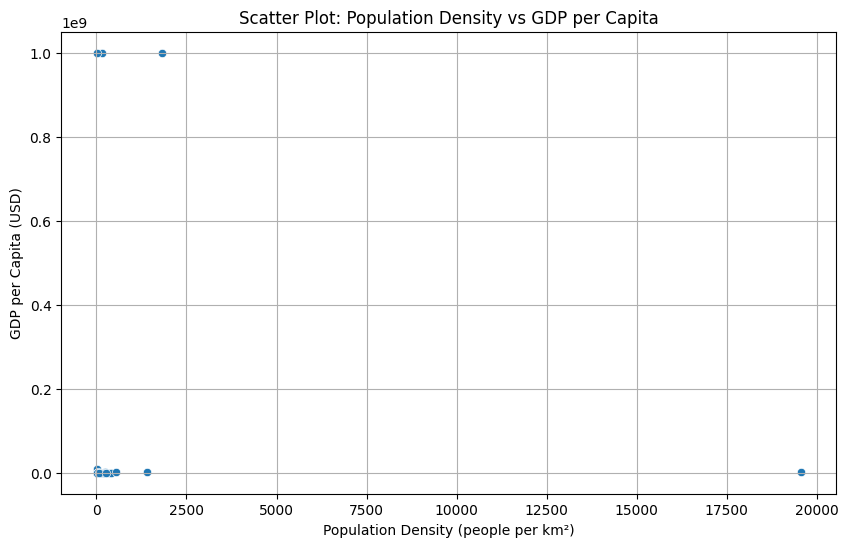

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=finaldata['Population Density'], y=finaldata['GDP per capita'])

# Labels & title

plt.xlabel('Population Density (people per km²)')
plt.ylabel('GDP per Capita (USD)')
plt.title('Scatter Plot: Population Density vs GDP per Capita')
plt.grid(True)

#Show plot

plt.show()

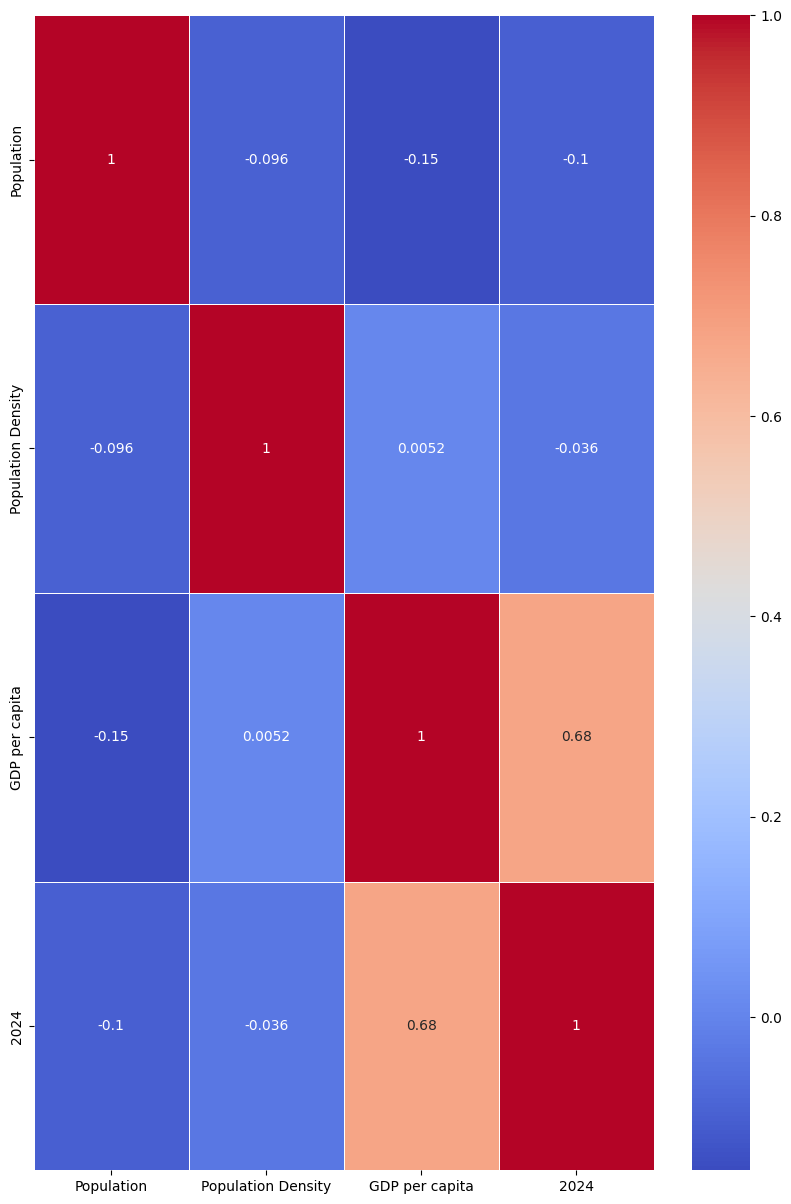

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt

#Select relevant columns

dff =finaldata[['Country', 'Population', 'Population Density', 'GDP per capita', '2024']]

#Set Country as index

dff=dff.set_index('Country')

#Create heatmap

plt.figure(figsize=(10, 15)) # Set figure size

# Corrected the typo from 'сmар' to 'cmap'
sns.heatmap(dff.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

#Show plot

plt.show()

In [ ]:
finaldata.sort_values(by='2024', ascending=False,inplace=True)

In [ ]:
dff = finaldata[['Population','Population Density','GDP per capita','2024']].copy()

dff = dff.round(2)

dff['Country']=finaldata['Country'].values
print(dff.head())

    Population Population Density  GDP per capita       2024       Country
17    343353.0           3.333524    1.000000e+09  343353.00       Iceland
1      77335.0         165.245726    1.000000e+09   77335.00       Andorra
45       800.0        1818.181818    1.000000e+09     800.00  Vatican City
24    634814.0         245.481052    1.000000e+06     634.81    Luxembourg
28    628053.0          45.471546    1.000000e+06     628.05    Montenegro


In [ ]:
[168] Import seaborn as sns import matplotlib.pyplot as plt

#Set 'Country' as index
dfn dff.set_index("Country')

#Convert all columns to numeric (force errors coerce to handle any bad values)
dfn dfn.apply(pd.to_numeric, errors-coerce')

#Fill any NaN values with column means (optional but recommended)
dfn dfn.fillna(dfn.mean())

#Normalize using Min-Max scaling to the range of 1-5
              dfn1+ (((dfn dfn.min()) / (dfn.max() dfn.min())) (5-1))

I

#Create the heatmap

plt.figure(figsize-(10, 6))
sns.heatmap(dfn, annot True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

#Show plot

plt.title("Normalized Heatmap of Population, Density, GDP per Capita, and 2024 GDP")
plt.show()

In [ ]:
finaldata.to_csv("europedata.csv",index=False)

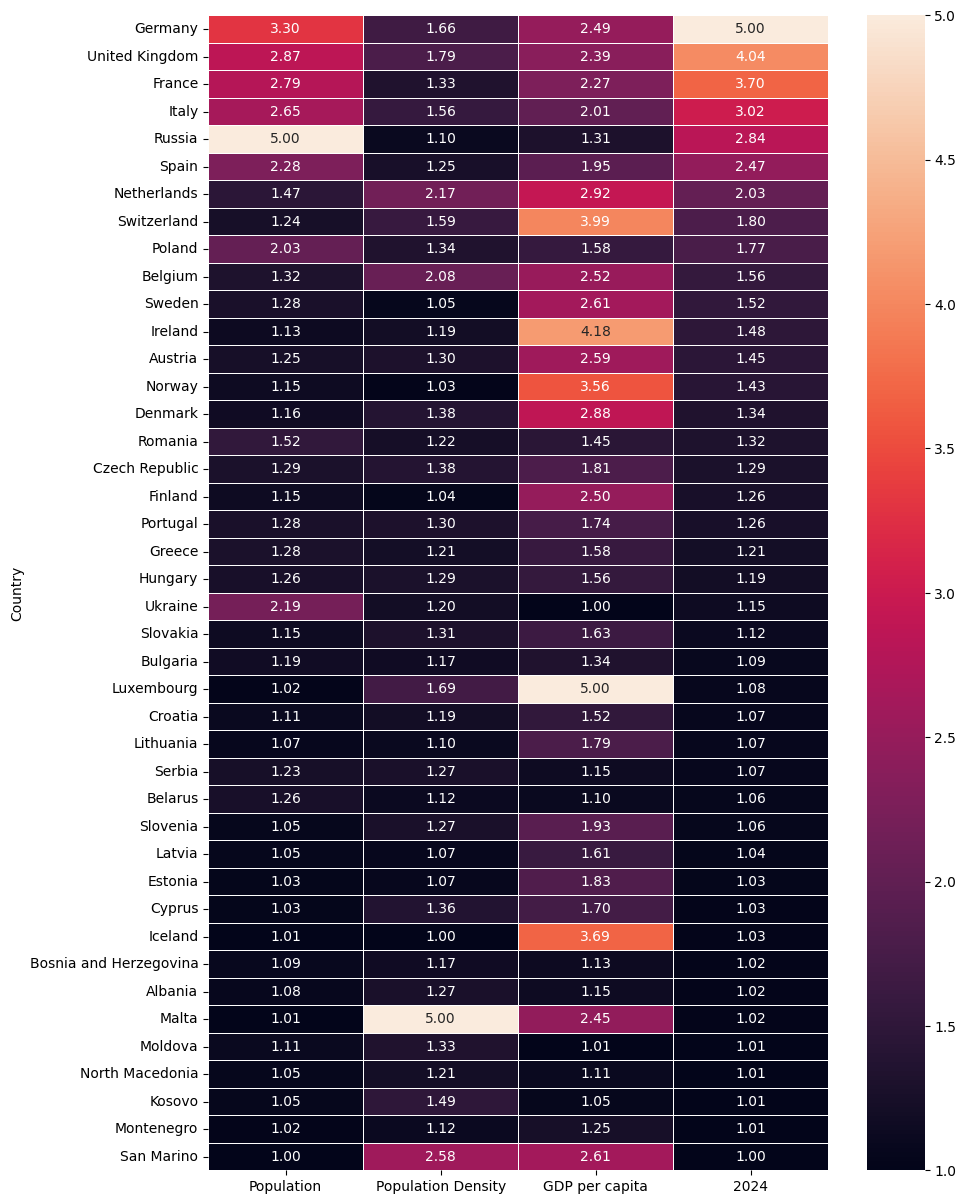

In [ ]:
df_scaled = dff.set_index('Country')
df_scaled = (df_scaled - df_scaled.mean()) / df_scaled.std()
plt.figure(figsize=(10,15))
sns.heatmap(___________)
plt.show()

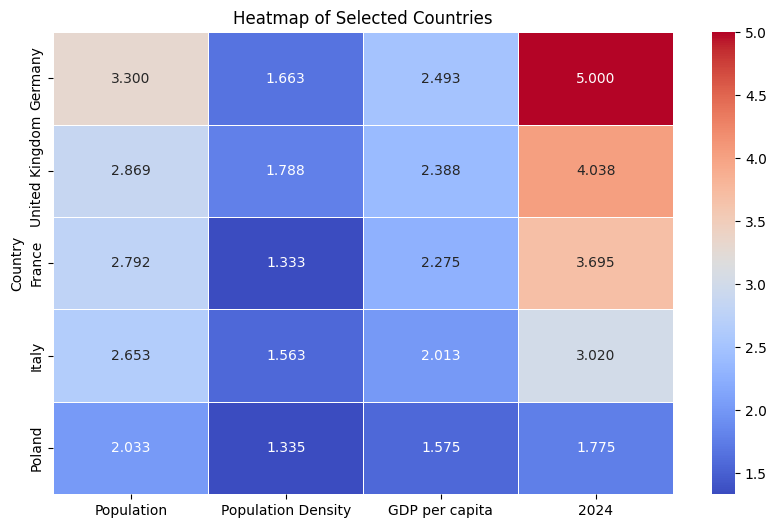

In [ ]:


# Apply filtering conditions on the scaled dataframe
filtered_dfn = dfn[
    (dfn['Population Density'] > 1.3) &
    (dfn['Population'] > 1.5) &
    (dfn['2024'] > 1.3) &
    (dfn['GDP per capita'] > 1.5)
]

# Plot heatmap for the filtered countries
plt.figure(figsize=(10, 6))  # Adjust size if needed
sns.heatmap(_______)

# Show the heatmap
plt.title("Heatmap of Selected Countries")
plt.show()

# New Section

In [ ]:


# Load the dataset


# Rename columns for clarity


# Select relevant columns for analysis
df_selected = data[["Country", "Population", "Population Density", "GDP per capita", "GDP (Billion)"]]

# Define weights for scoring
weights = {
    "GDP per capita": 0.4,     # Higher purchasing power
    "Population": 0.3,         # Large customer base
    "Population Density": 0.2, # Urbanization & foot traffic
    "GDP (Billion)": 0.1       # Economic stability
}

# Normalize data using Min-Max Scaling
df_normalized = df_selected.copy()
for col in weights.keys():
    df_normalized[col] = (df_normalized[col] - df_normalized[col].min()) / (df_normalized[col].max() - df_normalized[col].min())

# Compute the Retail Score using weighted sum
df_normalized["Retail Score"] = sum(df_normalized[col] * weight for col, weight in weights.items())

# Get top 10 countries for retail expansion
top_10_countries = df_normalized.nlargest(10, "Retail Score")[["Country", "Retail Score"]]

# Filter the dataset to include only these top 10 countries
df_top_10 = df_normalized[df_normalized["Country"].isin(top_10_countries["Country"])]

# Set Country as index for visualization
df_top_10 = df_top_10.set_index("Country")

# Heatmap for only the top 10 countries
plt.figure(figsize=(12, 8))
sns.heatmap(________)
plt.title("Retail Expansion Potential - Top 10 Countries")
plt.show()

NameError: name 'data' is not defined

In [ ]:

#Load dataset

# Rename columns for clarity


# Select relevant columns for analysis
df_selected = data2[["Country", "Population", "Population Density", "GDP per capita", "GDP (Billion)"]]

# Define weights for scoring
weights = {
    "GDP per capita": 0.4,     # Higher purchasing power
    "Population": 0.2,         # Large customer base
    "Population Density": 0.2, # Urbanization & foot traffic
    "GDP (Billion)": 0.2       # Economic stability
}

# Normalize data using Min-Max Scaling (but scaled between 1 and 5 instead of 0 and 1)
df_scaled = df_selected.copy()
for col in weights.keys():
    df_scaled[col] = 1 + 4 * (df_scaled[col] - df_scaled[col].min()) / (df_scaled[col].max() - df_scaled[col].min())

# Compute the Retail Score using weighted sum
df_scaled["Retail Score"] = sum(df_scaled[col] * weight for col, weight in weights.items())

# Get top 10 countries for retail expansion
top_10_countries = df_scaled.nlargest(10, "Retail Score")[["Country", "Retail Score"]]

# Filter the dataset to include only these top 10 countries
df_top_10 = df_scaled[df_scaled["Country"].isin(top_10_countries["Country"])]

# Set Country as index for visualization
df_top_10 = df_top_10.set_index("Country")

# Heatmap for only the top 10 countries (with values between 1 and 5)
plt.figure(figsize=(12, 8))
sns.heatmap(_____)
plt.title("Retail Expansion Potential - Top 10 Countries (Scaled 1 to 5)")
plt.show()

In [ ]:

#Load the dataset

# Rename columns for clarity

# Select relevant columns for analysis
df_selected = data3[["Country", "Population", "Population Density", "GDP per capita", "GDP (Billion)"]]

# Define updated weights
weights = {
    "GDP per capita": 0.3,     # Purchasing power
    "Population": 0.15,        # Market size
    "Population Density": 0.15,# Urbanization & foot traffic
    "GDP (Billion)": 0.4       # Economic stability & growth
}

# Normalize data using Min-Max Scaling (Scaled between 1 and 5)
df_scaled = df_selected.copy()
for col in weights.keys():
    df_scaled[col] = 1 + 4 * (df_scaled[col] - df_scaled[col].min()) / (df_scaled[col].max() - df_scaled[col].min())

# Compute the new Retail Score using weighted sum
df_scaled["Retail Score"] = sum(df_scaled[col] * weight for col, weight in weights.items())

# Get top 10 countries for retail expansion based on new weights
top_10_countries = df_scaled.nlargest(10, "Retail Score")[["Country", "Retail Score"]]

# Filter the dataset to include only the top 10 countries
df_top_10 = df_scaled[df_scaled["Country"].isin(top_10_countries["Country"])].set_index("Country")

# Heatmap for the top 10 countries (values scaled between 1 and 5)
plt.figure(figsize=(12, 8))
sns.heatmap(________)

# Title and show plot
plt.title("Retail Expansion Potential - Top 10 Countries (Scaled 1 to 5)")
plt.show()

In [ ]:

df = pd.read_csv(file_path)


# Select relevant columns for analysis
df_selected = data[["Country", "Population", "Population Density", "GDP per capita", "GDP (Billion)"]]

# Define updated weights
weights = {
    "GDP per capita": 0.3,     # Purchasing power
    "Population": 0.15,        # Market size
    "Population Density": 0.15,# Urbanization & foot traffic
    "GDP (Billion)": 0.4       # Economic stability & growth
}

# Normalize data using Min-Max Scaling (Scaled between 1 and 5)
df_scaled = df_selected.copy()
for col in weights.keys():
    df_scaled[col] = 1 + 4 * (df_scaled[col] - df_scaled[col].min()) / (df_scaled[col].max() - df_scaled[col].min())

# Compute the new Retail Score using weighted sum
df_scaled["Retail Score"] = sum(df_scaled[col] * weight for col, weight in weights.items())

# Get top 10 countries for retail expansion based on new weights
top_10_countries = df_scaled.nlargest(10, "Retail Score")

# Sort by Retail Score before plotting
df_top_10 = top_10_countries.set_index("Country").sort_values(by="Retail Score", ascending=False)

# Heatmap for the top 10 countries (values scaled between 1 and 5)
plt.figure(figsize=(12, 8))
sns.heatmap(_________)

# Title and show plot
plt.title("Retail Expansion Potential - Top 10 Countries (Sorted by Retail Score)")
plt.show()